# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [122]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [123]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [124]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [125]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV

In [127]:
df = df.select_dtypes(include='number')
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,6,1,0,0,5.52,0
1,1,112,20,3,6,0,0,0,5.52,0
2,2,243,22,17,3,1,1,0,5.52,0
3,1,96,31,4,6,0,0,1,5.52,0
4,2,68,22,15,3,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0
49996,1,111,6,4,7,0,0,0,5.62,0
49997,1,24,6,22,6,0,0,1,5.62,0
49998,1,15,6,11,1,1,0,1,5.62,0


In [128]:
# create a dataset without the target variable.
df_1 = df.iloc[:,:-1]
df_1

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,262,19,7,6,1,0,0,5.52
1,1,112,20,3,6,0,0,0,5.52
2,2,243,22,17,3,1,1,0,5.52
3,1,96,31,4,6,0,0,1,5.52
4,2,68,22,15,3,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62
49996,1,111,6,4,7,0,0,0,5.62
49997,1,24,6,22,6,0,0,1,5.62
49998,1,15,6,11,1,1,0,1,5.62


In [129]:

# scale the dataset for machine learning purposes
scale = StandardScaler()

# fit and transform the data
scale_df = scale.fit_transform(df_1)

# create a dataframe of scled data
scale_df = pd.DataFrame(scale_df, columns = df_1.columns)

# add the booking_complete column back to the dataframe
scale_df['complete_booking'] = df.booking_complete
scale_df

C:\Users\JusticePC\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\JusticePC\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,complete_booking
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,0
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,0
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,0
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,0
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,0
...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368,0
49996,-0.579559,0.288108,-0.502977,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368,0
49997,-0.579559,-0.673744,-0.502977,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368,0
49998,-0.579559,-0.773246,-0.502977,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368,0


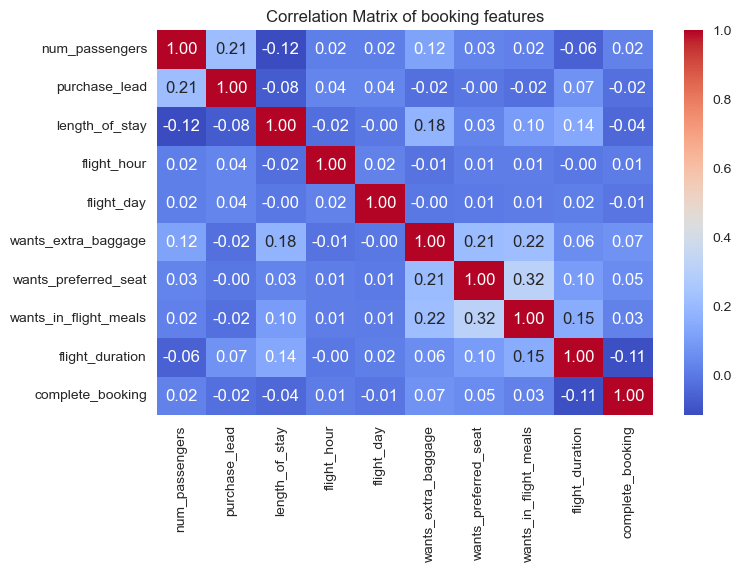

In [130]:
# compute the correlation matrix
correlation_matrix = scale_df.corr()
figure = plt.figure(figsize = (8,5))
sns.heatmap(correlation_matrix, annot=True, fmt= ".2f", cmap='coolwarm')
plt.title('Correlation Matrix of booking features');

#### Balancing dataset

In [131]:
# check if dataset is balanced
scale_df['complete_booking'].value_counts()

complete_booking
0    42522
1     7478
Name: count, dtype: int64

In [132]:
#create a dataframe having all labels 0 with 7500 samples
scale_df1 = scale_df[scale_df['complete_booking'] ==0].sample(n=7500)
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scale_df2 = pd.concat([scale_df[scale_df['complete_booking']==1], scale_df1], ignore_index=True)
#shuffle the dataframe rows
new_df = scale_df2.sample(frac = 1).reset_index(drop=True)
new_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,complete_booking
0,-0.579559,-0.784302,7.435092,-1.120780,-0.408687,0.703747,-0.649919,1.158082,1.037139,1
1,0.400684,-0.552131,-0.502977,-1.675042,-1.412314,0.703747,-0.649919,-0.863497,0.195370,0
2,-0.579559,0.840897,-0.030824,-1.675042,0.093127,0.703747,-0.649919,-0.863497,-1.742035,1
3,4.321659,0.973566,-0.502977,0.172497,0.594940,0.703747,1.538654,1.158082,-0.439297,1
4,-0.579559,-0.065677,0.529857,0.726759,0.093127,0.703747,-0.649919,-0.863497,1.037139,0
...,...,...,...,...,...,...,...,...,...,...
14973,1.380928,-0.784302,-0.502977,-0.012257,1.598567,0.703747,-0.649919,1.158082,0.930248,1
14974,-0.579559,1.305239,-0.178372,-1.490288,-0.910501,0.703747,-0.649919,-0.863497,-0.572911,1
14975,0.400684,-0.596354,-0.532487,0.357251,0.093127,0.703747,-0.649919,1.158082,1.037139,1
14976,0.400684,1.813805,-0.532487,-0.012257,0.594940,0.703747,-0.649919,1.158082,1.037139,0


#### Creation and Training of Model

In [141]:
# Split the data into training and testing sets
X = new_df.iloc[:,:-1]
y = new_df['complete_booking']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2, random_state=42)

#### Machine Learning Classifiers

In [134]:
# Create the Random Forest Classifier and train it
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 61.78%


In [135]:
# Create the Logistic Regression model and train it
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 60.08%


In [143]:
from sklearn.neighbors import KNeighborsClassifier
# Step 2: Create the KNN Classifier and train it
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifier.fit(X_train, y_train);

# Step 3: Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Step 4: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100));

Accuracy: 56.07%


C:\Users\JusticePC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [137]:
from sklearn.svm import SVC
# Step 2: Create the SVC Classifier and train it
svc_classifier = SVC(kernel='rbf')  # You can choose the kernel as needed ('linear', 'rbf', 'poly', etc.)
svc_classifier.fit(X_train, y_train)

# Step 3: Make predictions on the testing data
y_pred = svc_classifier.predict(X_test)

# Step 4: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 61.11%


In [148]:
from sklearn.tree import DecisionTreeClassifier
# Step 2: Create the Decision Tree Classifier and train it
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Step 3: Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Step 4: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 56.04%


In [151]:
import xgboost as xgb
# Create the XGBoost Classifier and train the model
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Step 3: Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)

# Step 4: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 62.85%


#### Classification report on best classifier

In [152]:
from sklearn.metrics import classification_report, confusion_matrix
#random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
#random_forest.fit(X_train, y_train)

# Make predictions on the testing data
#y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.6285046728971962
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62      1477
           1       0.63      0.63      0.63      1519

    accuracy                           0.63      2996
   macro avg       0.63      0.63      0.63      2996
weighted avg       0.63      0.63      0.63      2996

Confusion Matrix:
 [[919 558]
 [555 964]]


Text(0.5, 0, 'Random Forest Feature Importance')

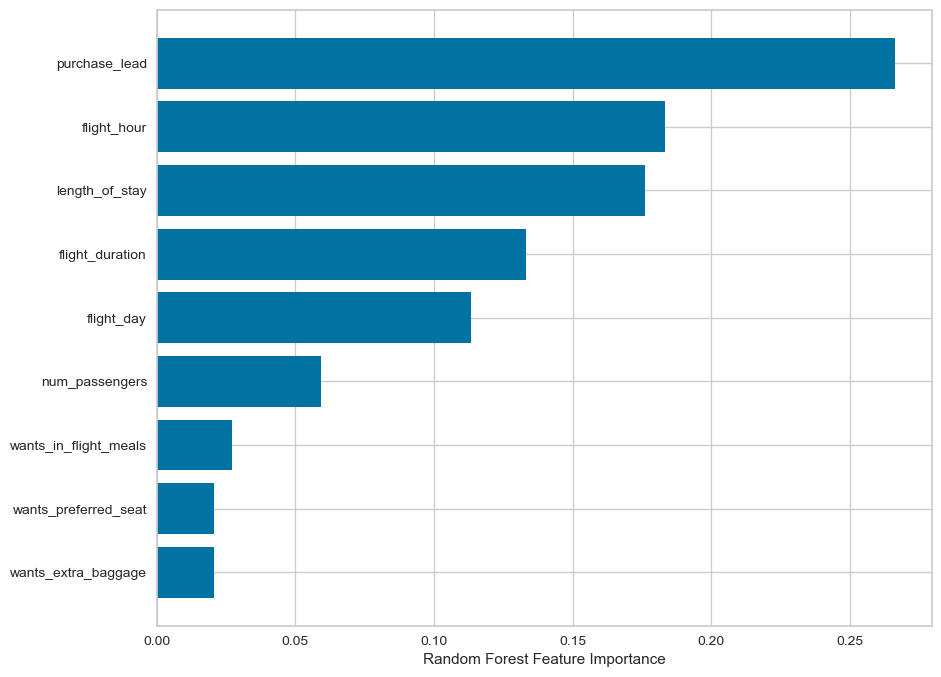

In [159]:
# Create a bar chart to visualize feature importances
plt.figure(figsize=(10,8))
sorted_idx = random_forest.feature_importances_.argsort()
plt.barh(new_df.iloc[:,:-1].columns[sorted_idx], random_forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [154]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold  # or StratifiedKFold for classification tasks
from sklearn.ensemble import RandomForestClassifier  # Replace with your model

# Create your machine learning model (e.g., RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Replace with your model and its hyperparameters

# Choose a cross-validation strategy, such as k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate a performance metric (e.g., accuracy)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores and their mean and standard deviation
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))


C:\Users\JusticePC\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\JusticePC\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\JusticePC\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\JusticePC\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in 

Cross-validation scores: [0.60747664 0.61849132 0.60914553 0.61402337 0.60934891]
Mean accuracy: 0.6116971543582874
Standard deviation: 0.004035091298106861


C:\Users\JusticePC\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
